# Titanic Project
## Problem Statement:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Titanic = pd.read_csv('titanic_train.csv')
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dataset contains 12 Columns and 891 Rows. Survided column is Label and rest are the features
Categorical Feature: In the dataset Survived, Sex and Embarked have categorical data also Pclass has the ordinal data. Numerical features: Here Age and Fare are continuous data, SibSp and Parch are discrete data. 

### Exploratory Data Analysis 

In [3]:
Titanic.shape

(891, 12)

Dataset have 891 row and 12 columns

#### Statistical analysis of dataset 

In [4]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

This describe method displaying only the numerical columns that are available in the dataset. This statistical description gives the count, mean, standard deviation, minimum quantile, 25% quantile, 50% quantile, 75% quantile range and maximum quantile range of the items.

In [5]:
# Getting an Overview of Data
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observation: Here it clearly shows that there is no null values and also the data types are all float(numeric)

In [6]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Observations:
### 1. Sex , Cabin and Embark have null values. 

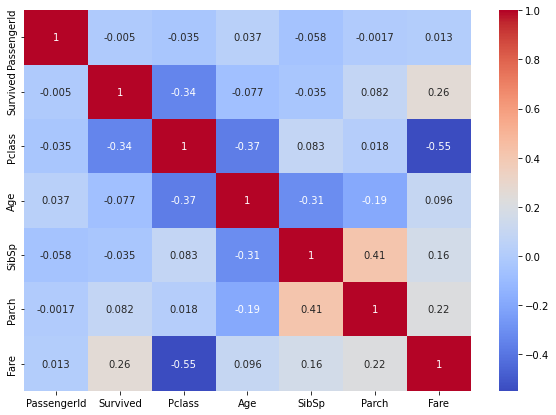

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(Titanic.corr(),cmap='coolwarm',annot=True);

In [8]:
Titanic = Titanic.drop(columns='Cabin', axis=1)

In [9]:
Titanic['Age'].fillna(Titanic['Age'].mean(), inplace=True)
Titanic['Embarked'].fillna(Titanic['Embarked'].mode()[0], inplace=True)

In [10]:
print(Titanic['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [11]:
Titanic.isnull().sum()#Checking null we see 0 null values.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
from sklearn.utils import shuffle
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Since data Pclass is following a pattern we are shuffling the data

In [13]:
Titanic = shuffle(Titanic)
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.000000,1,0,350025,7.8542,S
810,811,0,3,"Alexander, Mr. William",male,26.000000,0,0,3474,7.8875,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.000000,2,3,29106,18.7500,S
517,518,0,3,"Ryan, Mr. Patrick",male,29.699118,0,0,371110,24.1500,Q
510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.000000,0,0,382651,7.7500,Q
...,...,...,...,...,...,...,...,...,...,...,...
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.000000,0,0,110465,52.0000,S
805,806,0,3,"Johansson, Mr. Karl Johan",male,31.000000,0,0,347063,7.7750,S
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.000000,0,0,SC/AH Basle 541,13.7917,C
565,566,0,3,"Davies, Mr. Alfred J",male,24.000000,2,0,A/4 48871,24.1500,S


## Label Encoder 

In [14]:
from sklearn.preprocessing import LabelEncoder,power_transform
LE= LabelEncoder()
Titanic.Embarked=Titanic.Embarked.astype('str')
Titanic.Embarked=LE.fit_transform(Titanic.Embarked)
Titanic.Sex = LE.fit_transform(Titanic.Sex)

In [15]:
Titanic.drop(['PassengerId', 'Name', 'Ticket'],axis= 1, inplace=True)
Titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
704,0,3,1,26.0,1,0,7.8542,2
810,0,3,1,26.0,0,0,7.8875,2
437,1,2,0,24.0,2,3,18.7500,2


In [16]:
Titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


Above observaation shows there is no null value and Replacing Null values in Age didnt have much effect in mean of age

## Data VisualiZation 

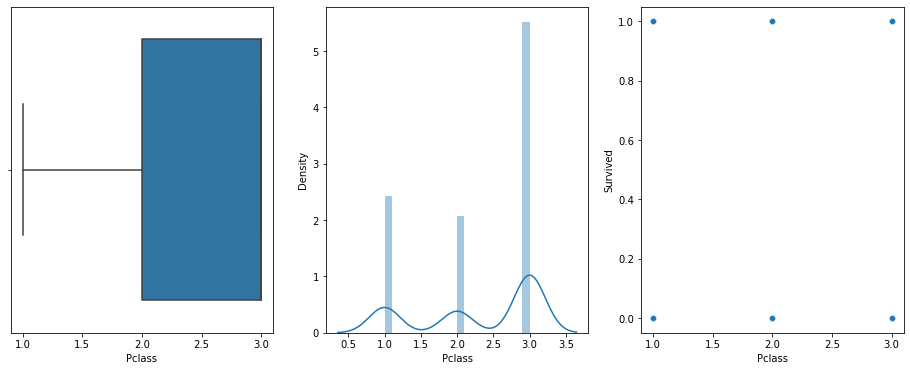

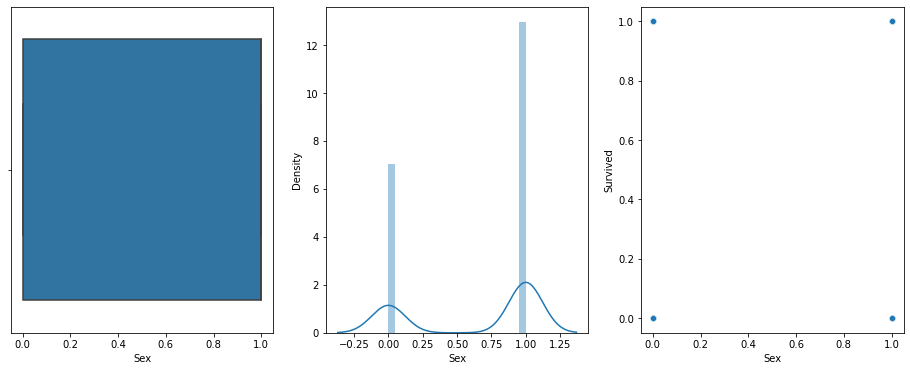

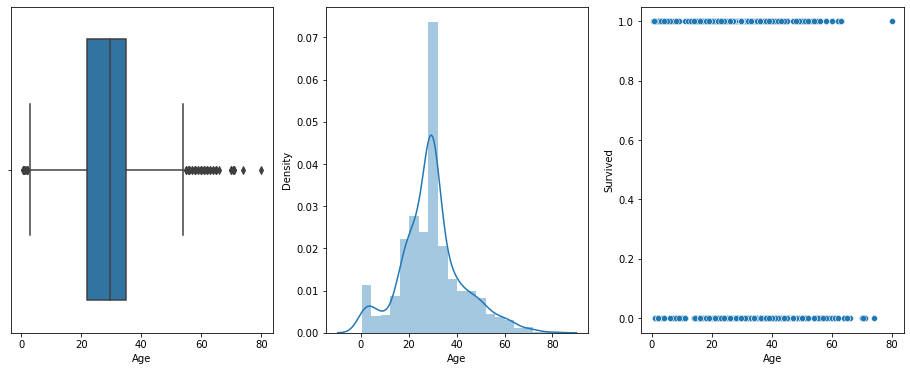

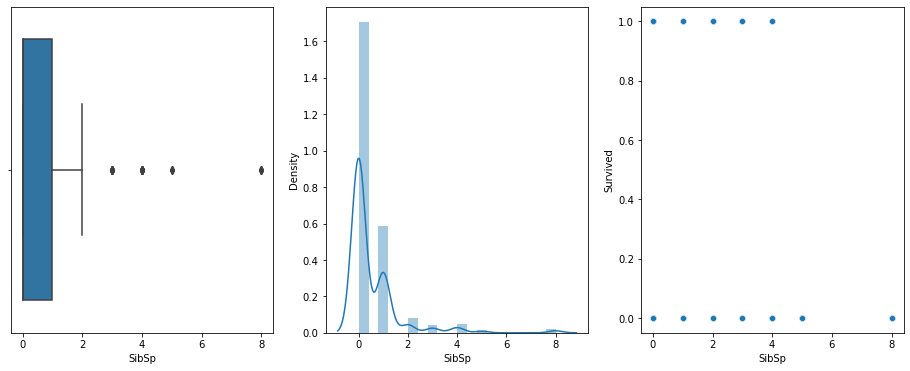

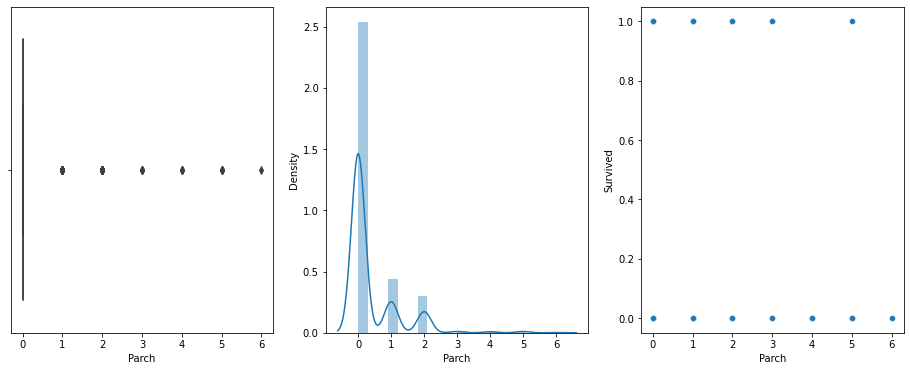

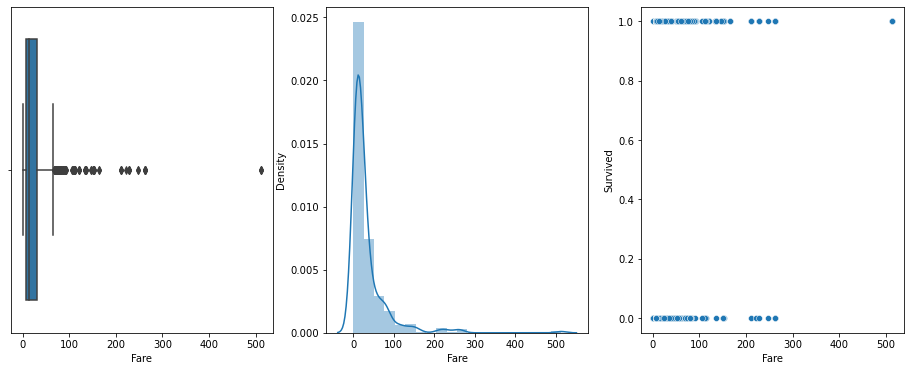

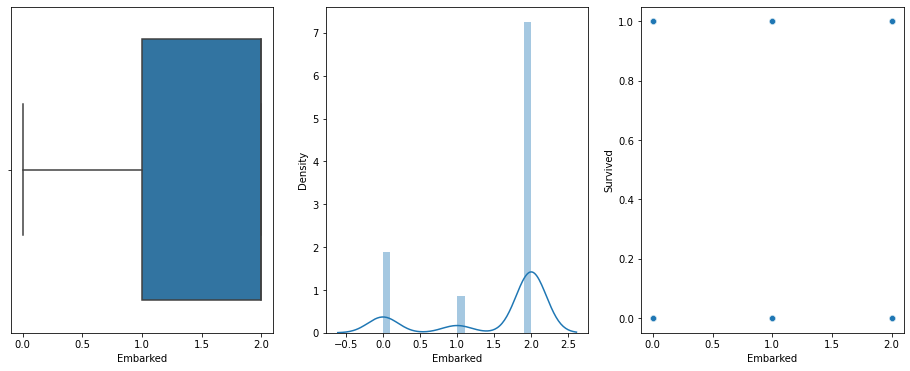

In [17]:
target_variable = "Survived"
feature_variable = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(16, 6))
    sns.boxplot(x=Titanic[feature_name], ax=axs[0])
    sns.distplot(Titanic[feature_name], bins=20, kde=True, ax=axs[1])
    sns.scatterplot(data=Titanic, x=feature_name, y=target_variable, ax=axs[2])
    plt.show()
    
for i in feature_variable:
    num_plots(i)   

In [18]:
import itertools

cols = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]

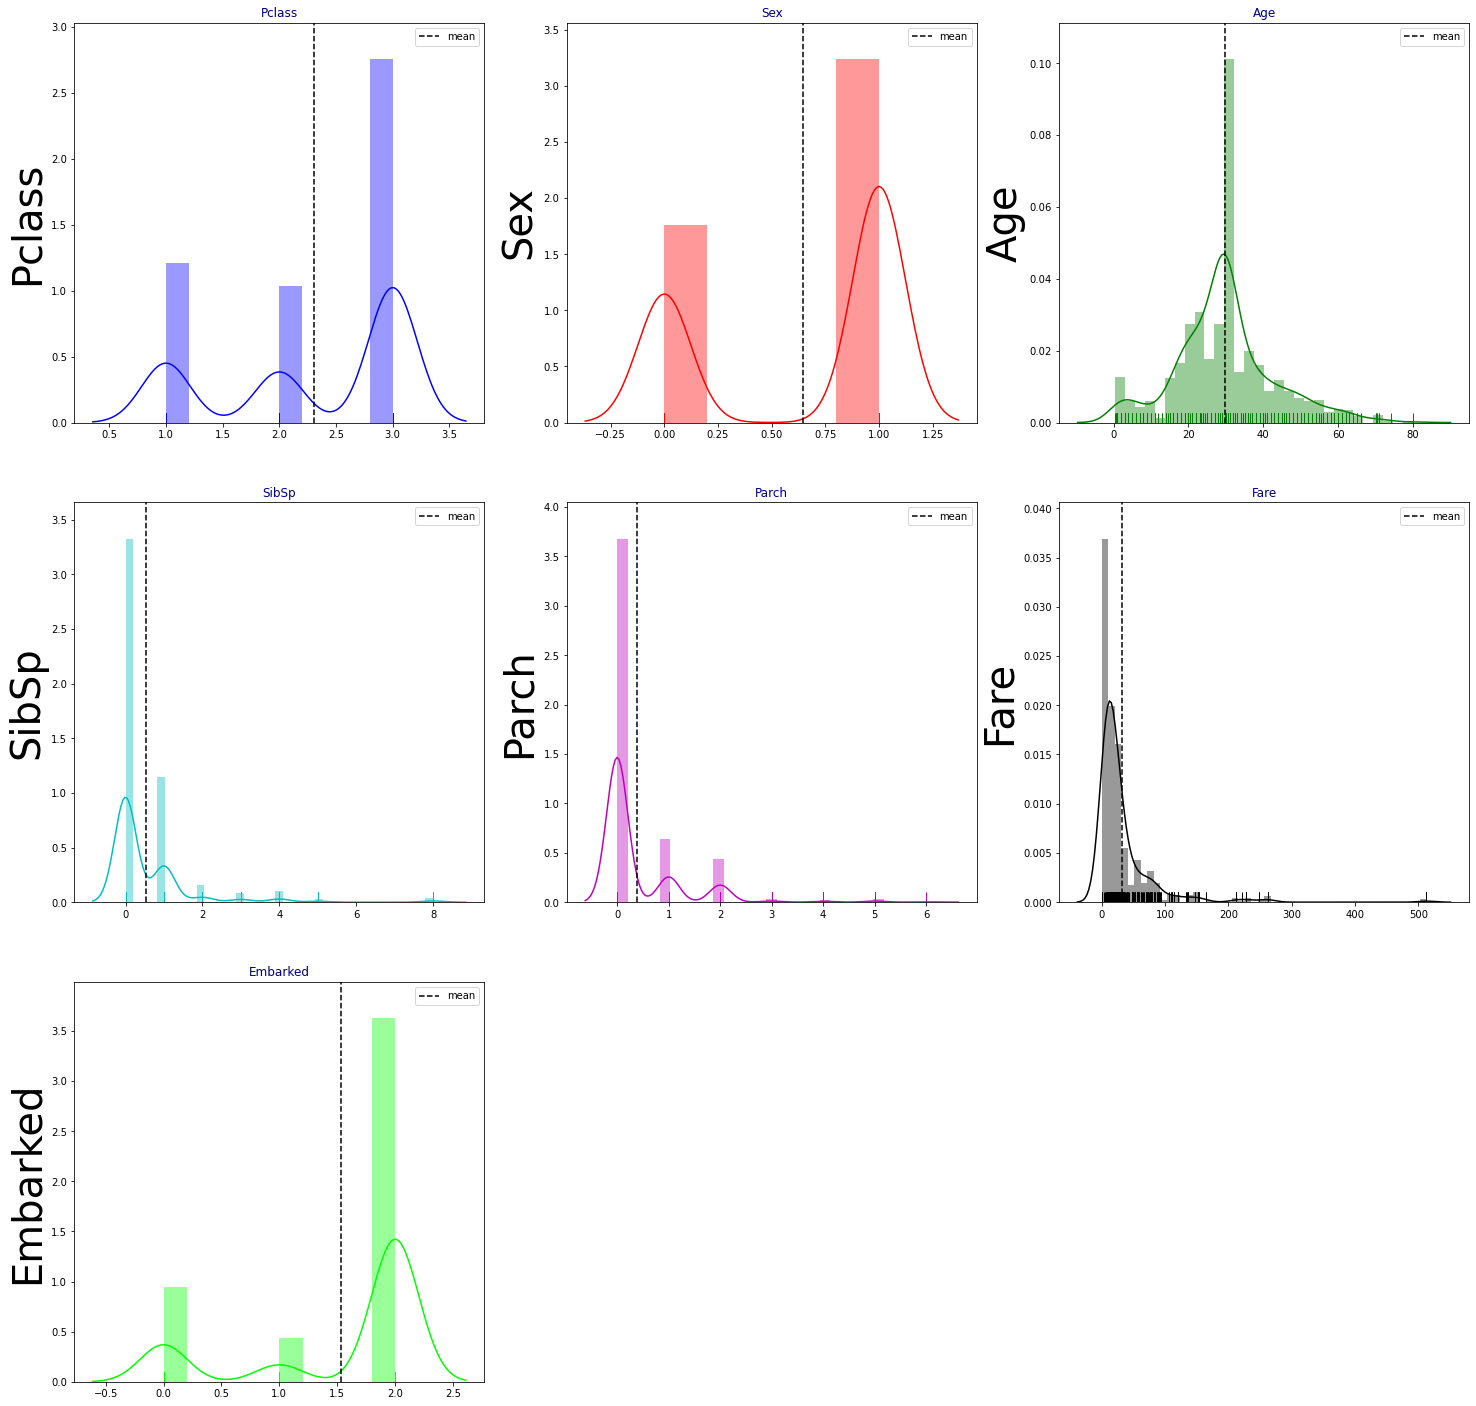

In [19]:
plt.figure(figsize=(25,25))
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(3,3,j+1)
    ax= sns.distplot(Titanic[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(Titanic[i].mean(), linestyle="dashed", label= "mean", color= "k")
    plt.legend(loc="best")
    plt.title(i,color = "navy")
    plt.xlabel("")
    plt.ylabel(i,fontsize = 40)

### Checking normal distribution of features 

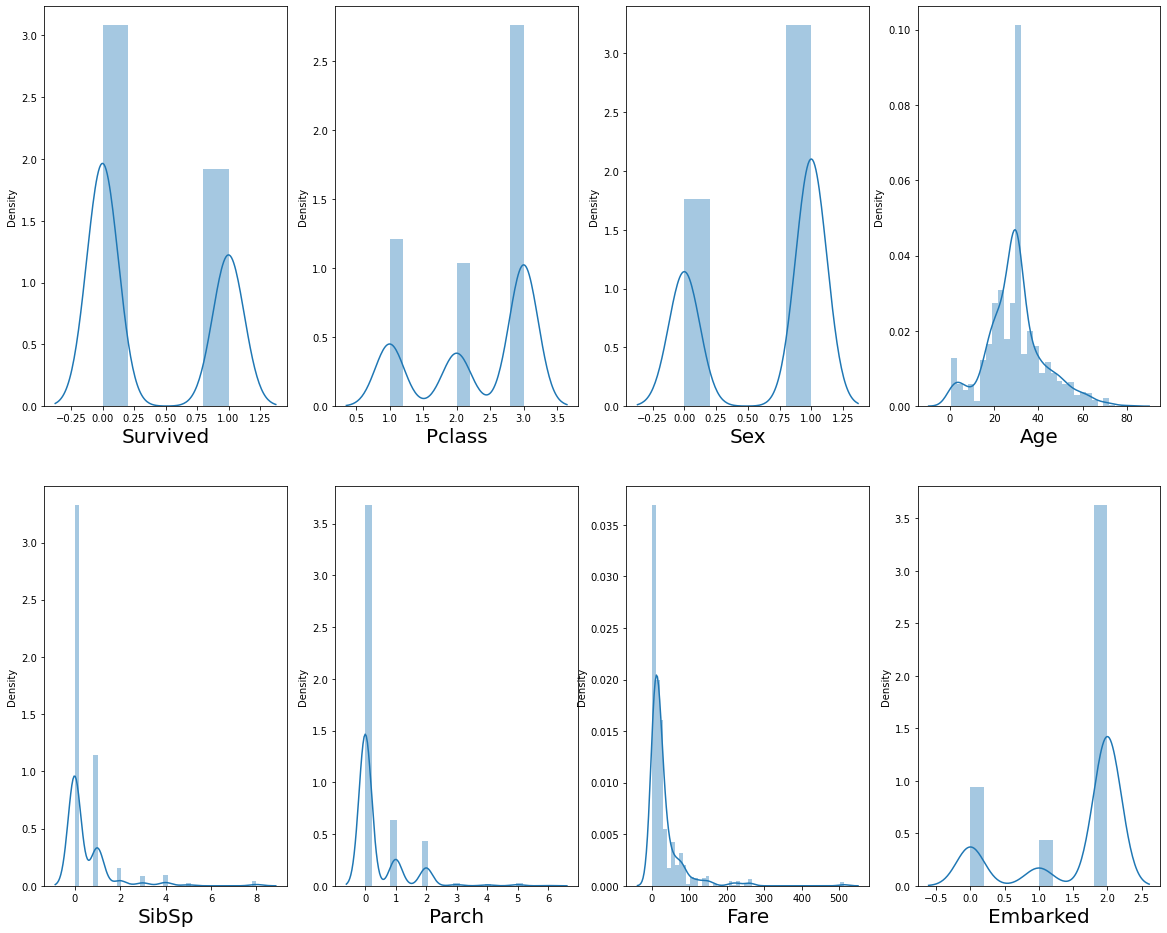

In [20]:
plt.figure(figsize=(20,25),facecolor="White")
plotnumber = 1

for column in Titanic:
    if plotnumber<12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(Titanic[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1;

1.Data has skewness and looks like has outliers.

2.Will check for the skewness and handle skewness

3.Will check for the outliers and check if needs to be removed

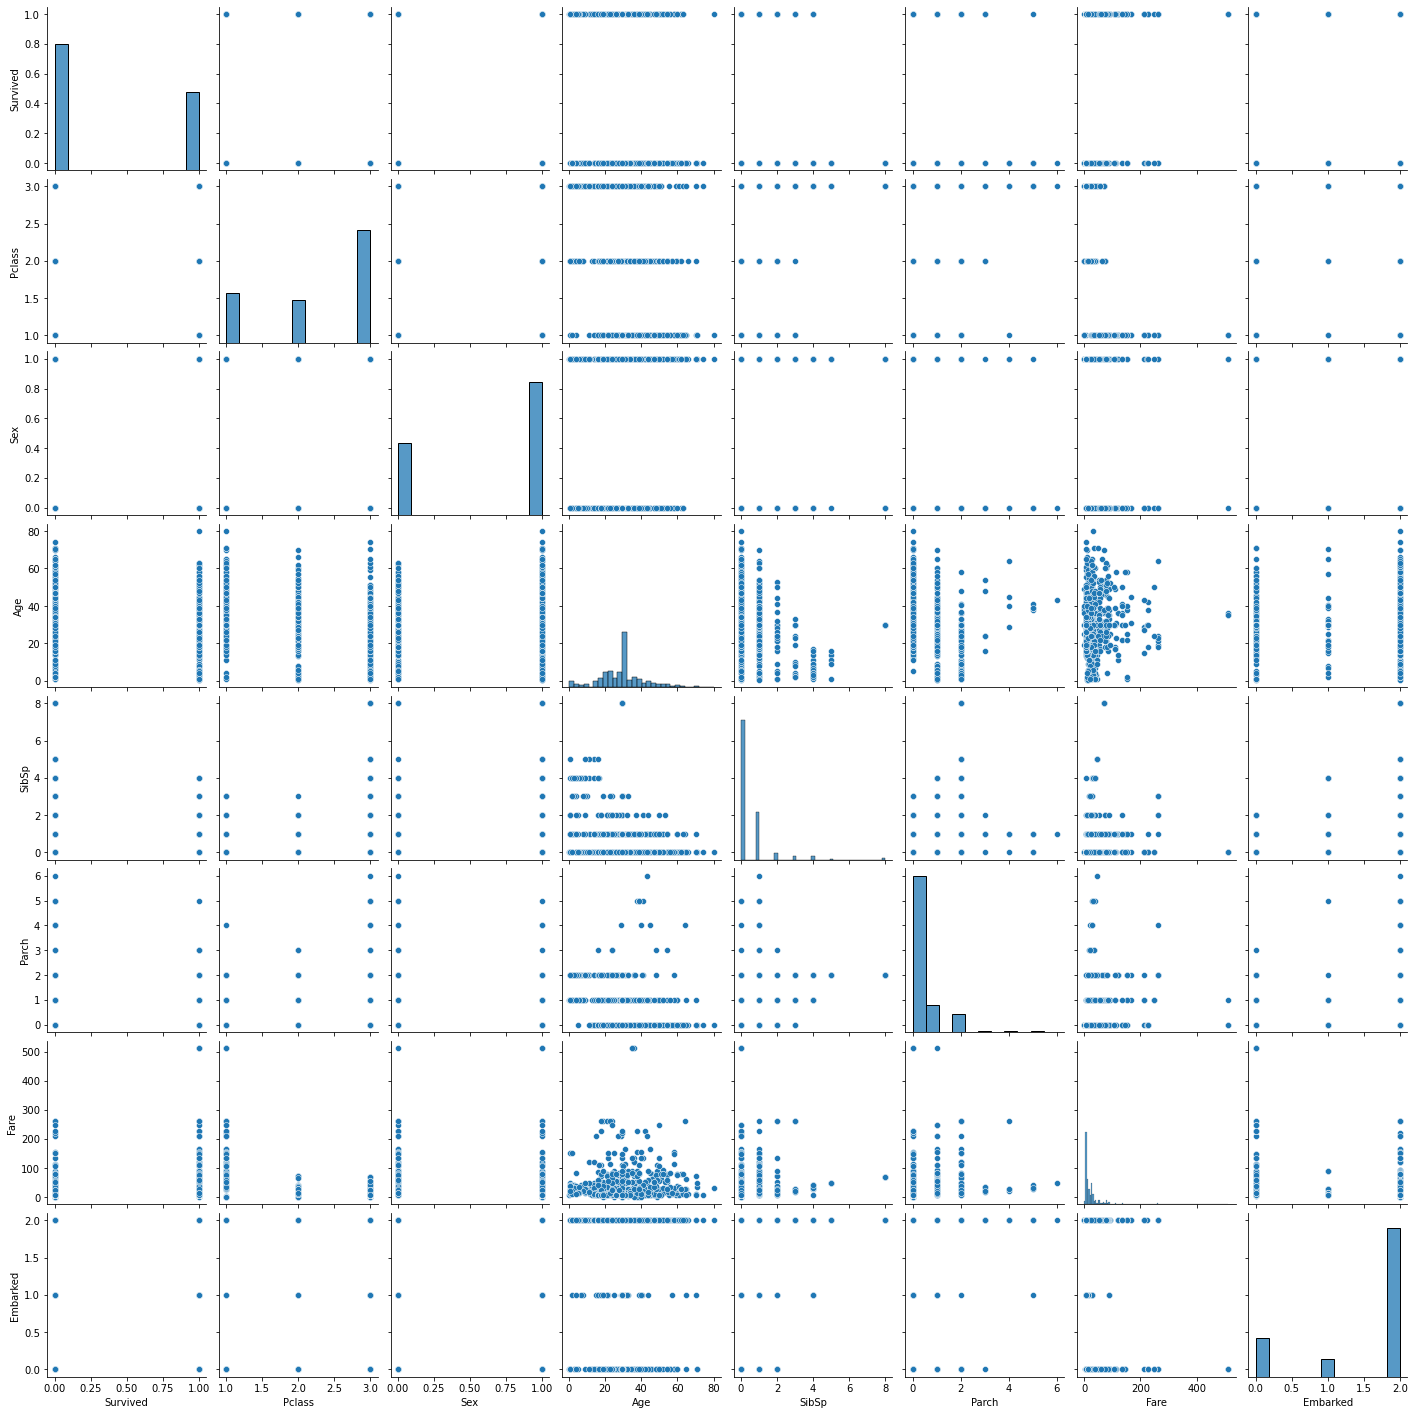

In [21]:
sns.pairplot(Titanic);

## Checking Co-relation 

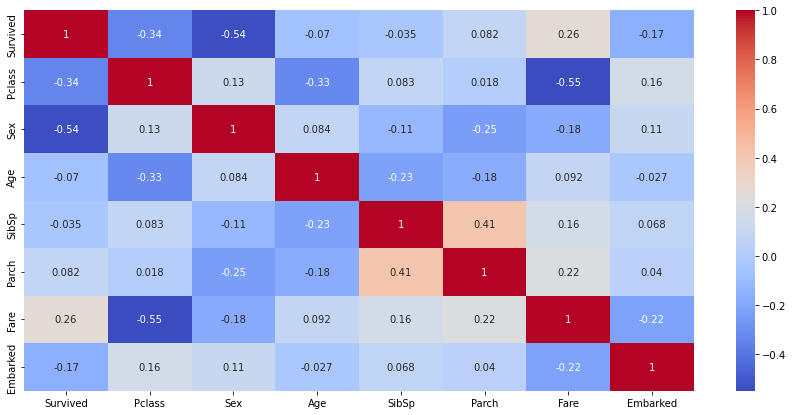

In [22]:
plt.figure(figsize=(15,7))
sns.heatmap(Titanic.corr(),cmap="coolwarm",annot=True);

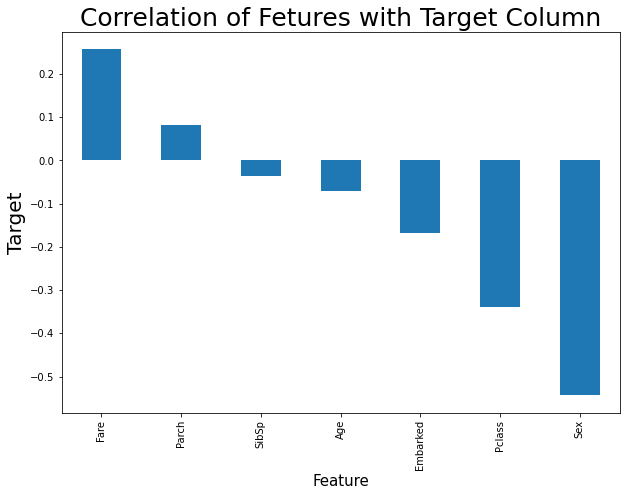

In [23]:
plt.figure(figsize = (10,7))
Titanic.corr()["Survived"].sort_values(ascending=False).drop(['Survived']).plot.bar()
plt.xlabel("Feature",fontsize= 15)
plt.ylabel('Target',fontsize= 20)
plt.title("Correlation of Fetures with Target Column",fontsize=25);

### Checking Histogram of features 

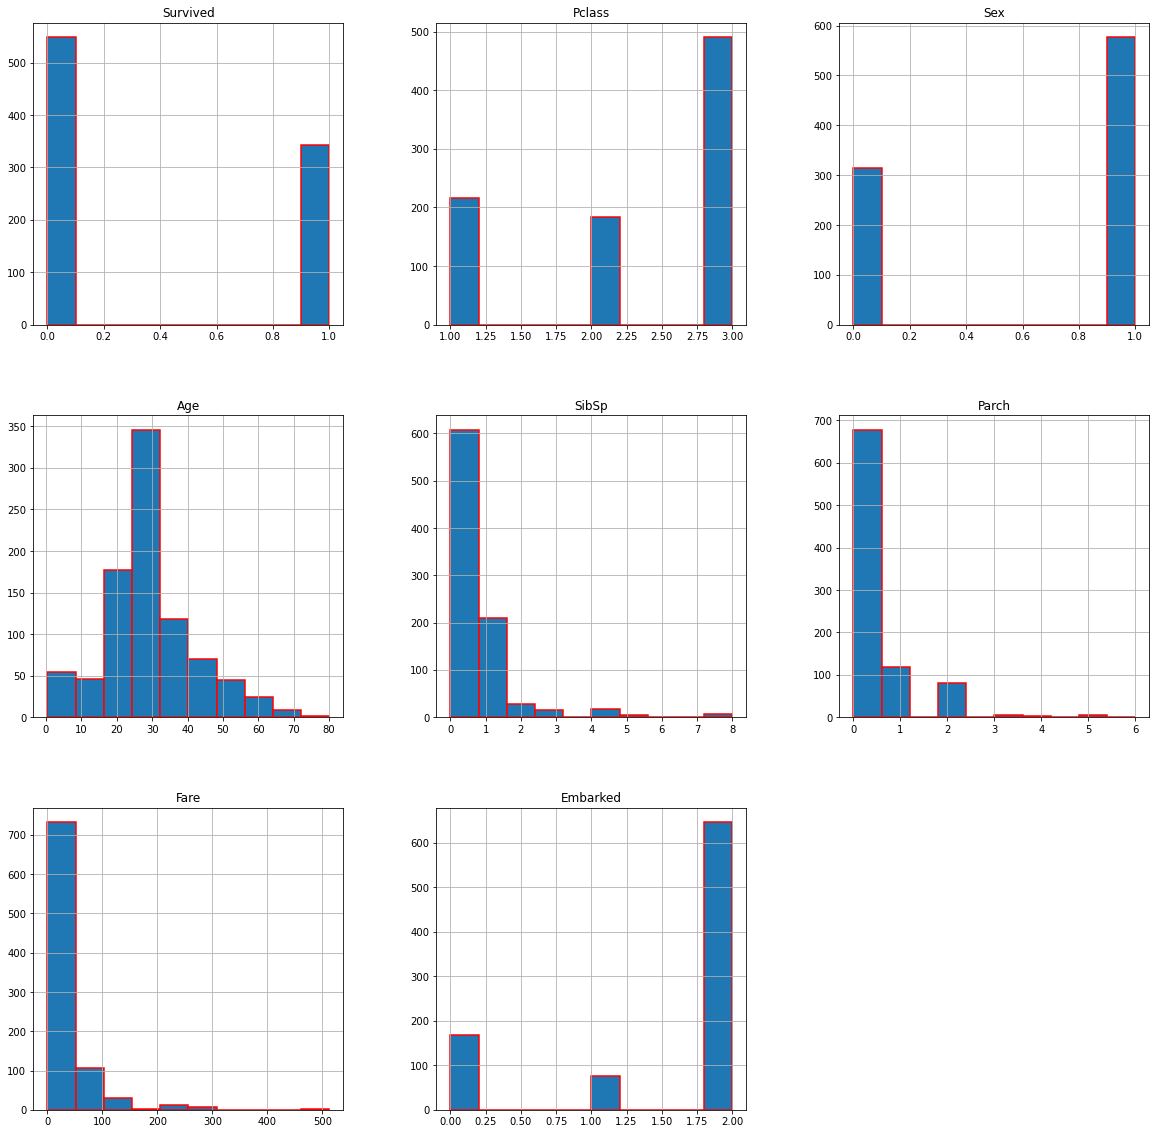

In [24]:
Titanic.hist(edgecolor = 'red',linewidth = 1.5,figsize=(20,20));

## Data PreProcessing 

### Splitting the data for train dataset for features and label 

In [25]:
X = Titanic.drop(["Survived"],axis = 1)
Y = Titanic.Survived

## Standar Scaler 

In [26]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
Scaled = SC.fit_transform(X)

In [27]:
Scaled

array([[ 0.82737724,  0.73769513, -0.2846632 , ..., -0.47367361,
        -0.49027979,  0.58595414],
       [ 0.82737724,  0.73769513, -0.2846632 , ..., -0.47367361,
        -0.48960931,  0.58595414],
       [-0.36936484, -1.35557354, -0.4385719 , ...,  3.25023685,
        -0.27089627,  0.58595414],
       ...,
       [-0.36936484, -1.35557354, -0.51552625, ..., -0.47367361,
        -0.37073009, -1.9423032 ],
       [ 0.82737724,  0.73769513, -0.4385719 , ..., -0.47367361,
        -0.16216896,  0.58595414],
       [ 0.82737724,  0.73769513,  0.        , ..., -0.47367361,
        -0.49187446,  0.58595414]])

###  Logistic Regression 

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [29]:
Accu = 0
X_train,X_test,Y_train,Y_test = train_test_split(Scaled,Y,test_size=.25,shuffle=True)
LR = LogisticRegression()
LR.fit(X_train,Y_train)
Y_pred = LR.predict(X_test)
Acc = accuracy_score(Y_test,Y_pred)
if Acc> Accu:
    Accu = Acc
print(f"Best Accuracy {Accu*100}")

Best Accuracy 80.26905829596413


###  Splitting data into training and testing set

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(Scaled,Y,test_size=.25,shuffle=True)

## Finding the Best model

Model Score : 0.8038922155688623
Accuracy Score of LogisticRegression() is : 0.8071748878923767 


Confusion Metrics of LogisticRegression() is :

 [[118  16]
 [ 27  62]] 


Classification Report of LogisticRegression() is :
               precision    recall  f1-score   support

           0       0.81      0.88      0.85       134
           1       0.79      0.70      0.74        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.80       223
 


Roc Auc Score Of LogisticRegression() is : 0.7886131142042596 




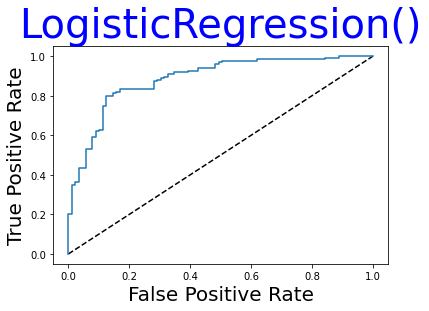

----------------------------------*********--------------------------------------

Model Score : 0.7964071856287425
Accuracy Score of GaussianNB() is : 0.7892376681614349 


Confusion Metrics of GaussianNB() is :

 [[115  19]
 [ 28  61]] 


Classification Report of GaussianNB() is :
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       134
           1       0.76      0.69      0.72        89

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223
 


Roc Auc Score Of GaussianNB() is : 0.7718011068254235 




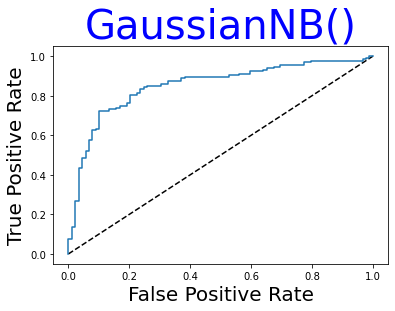

----------------------------------*********--------------------------------------



In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,roc_auc_score
LG = [LogisticRegression(),GaussianNB()]

for lg in LG:
    lg.fit(X_train,Y_train)
    print('Model Score :',lg.score(X_train,Y_train))
    lg_pred = lg.predict(X_test)
    print(f"Accuracy Score of {lg} is :",accuracy_score(Y_test,lg_pred),"\n\n")
    print(f"Confusion Metrics of {lg} is :\n\n",confusion_matrix(Y_test,lg_pred),"\n\n")
    print(f"Classification Report of {lg} is :\n",classification_report(Y_test,lg_pred),"\n\n")
    print(f"Roc Auc Score Of {lg} is :",roc_auc_score(Y_test,lg_pred),"\n\n")
    Y_pred_prob = lg.predict_proba(X_test)[:,0]
    tpr,fpr,threshold = roc_curve(Y_test,Y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label = lg)
    plt.xlabel('False Positive Rate',fontsize=20)
    plt.ylabel('True Positive Rate',fontsize=20)
    plt.title(lg, fontsize=40, color="b")
    plt.show()
    print("----------------------------------*********--------------------------------------")
    print()

In [32]:
SD = [ SVC(), DecisionTreeClassifier()]

for m in SD:
    
    m.fit(X_train,Y_train)
    print("Model Score :" ,m.score(X_train,Y_train))
    sd_predm = m.predict(X_test)
    print("Accuracy Score of ",m,"is :",accuracy_score(Y_test,sd_predm),"\n\n")
    print("ConfusionMatrix of ",m,"is :\n",confusion_matrix(Y_test,sd_predm),"\n\n")     
    print("classification_report of ",m, "is :\n",classification_report(Y_test,sd_predm),"\n\n")
    print("roc_auc_score of",m, " is :", roc_auc_score(Y_test,m.predict(X_test)),"\n\n")
    print("------------------------------*******---------------------------------------")
    print('\n')

Model Score : 0.8458083832335329
Accuracy Score of  SVC() is : 0.8251121076233184 


ConfusionMatrix of  SVC() is :
 [[126   8]
 [ 31  58]] 


classification_report of  SVC() is :
               precision    recall  f1-score   support

           0       0.80      0.94      0.87       134
           1       0.88      0.65      0.75        89

    accuracy                           0.83       223
   macro avg       0.84      0.80      0.81       223
weighted avg       0.83      0.83      0.82       223
 


roc_auc_score of SVC()  is : 0.7959919503605568 


------------------------------*******---------------------------------------


Model Score : 0.9805389221556886
Accuracy Score of  DecisionTreeClassifier() is : 0.757847533632287 


ConfusionMatrix of  DecisionTreeClassifier() is :
 [[106  28]
 [ 26  63]] 


classification_report of  DecisionTreeClassifier() is :
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       134
           1 

## Hyper Tuning 

### Grid Search 

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
 
parameters = {'n_estimators' : (10,30,50,70,90,100)
              , 'criterion' : ('gini', 'entropy')
              , 'max_depth' : (3,5,7,9,10)
              , 'max_features' : ('auto', 'sqrt')
              , 'min_samples_split' : (2,4,6)
             }
RF_grid  = GridSearchCV(RandomForestClassifier(n_jobs = -1, oob_score= False), param_grid = parameters, cv = 3, verbose = True)

In [34]:
RF_grid_model = RF_grid.fit(X_train, Y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


In [35]:
RF_grid_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=4, n_estimators=50, n_jobs=-1)

Model Score : 0.9805389221556886
Accuracy Score of  DecisionTreeClassifier() is : 0.757847533632287 


ConfusionMatrix of  DecisionTreeClassifier() is :

 [[106  28]
 [ 26  63]] 


classification_report of  DecisionTreeClassifier() is :
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       134
           1       0.69      0.71      0.70        89

    accuracy                           0.76       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223
 


roc_auc_score of DecisionTreeClassifier()  is : 0.7494549723293644 




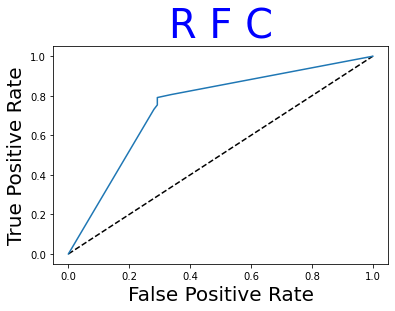

------------------------------*******---------------------------------------




In [36]:
RFC=  RF_grid_model.best_estimator_

RFC.fit(X_train,Y_train)
print("Model Score :" ,m.score(X_train,Y_train))
predm = m.predict(X_test)
print("Accuracy Score of ",m,"is :",accuracy_score(Y_test,predm),"\n\n")
print("ConfusionMatrix of ",m,"is :\n\n",confusion_matrix(Y_test,predm),"\n\n")     
print("classification_report of ",m, "is :\n",classification_report(Y_test,predm),"\n\n")
print("roc_auc_score of",m, " is :", roc_auc_score(Y_test,m.predict(X_test)),"\n\n")
Y_pred_prob = m.predict_proba(X_test)[:,0]
tpr,fpr,threshold = roc_curve(Y_test,Y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = m)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title("R F C", fontsize=40, color="b")
plt.show() 
print("------------------------------*******---------------------------------------")
print('\n')

## Serialization 
From the above its is evident that the RandomForestClassifier(max_depth=9, max_features='sqrt', min_samples_split=4, n_estimators=90, n_jobs=-1) is the best Model since it has less difference between the Model Score and Accuracy Score.

In [37]:
import joblib
joblib.dump(RFC,"Titanic_Survied_model.pkl")

['Titanic_Survied_model.pkl']

In [38]:
RFC_from_joblib = joblib.load("Titanic_Survied_model.pkl")
RFC_from_joblib.predict(X_test)

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0], dtype=int64)

In [39]:
print("Model Score test data :" ,RFC_from_joblib.score(X_test,Y_test))

Model Score test data : 0.8340807174887892
